In [115]:
import pandas as pd
import numpy as np
df= pd.read_pickle('../../data/Performance Leaders/univ_cumulative_returns_multihorizon_500_20230918.pkl')
df=df.drop(columns ='DATE')
df = df[df['niche'].isin(['Growth','Broad-based','Value'])]
df = df[df['focus'].isin(['Large Cap','Mid Cap','Small Cap','Total Market','Extended Market'])]
df=df.replace('',np.nan)
df

cum_ret_0M  cum_ret_0Q  cum_ret_0Y UNIVERSE  \
DATE       lss_ticker                                                
08/31/2023 SWPPX-US           0.0    1.572737   18.703201    SWPPX   
           JLGMX-US           0.0    2.452076   26.449273    JLGMX   
           DFQTX-US           0.0    1.650172   14.290641    DFQTX   
           DFEOX-US           0.0    1.759630   15.407957    DFEOX   
           DFIEX-US           0.0    0.342904   10.130957    DFIEX   
...                           ...         ...         ...      ...   
06/29/2023 REVIX-US           NaN         NaN    5.665047    REVIX   
           VVOSX-US           NaN         NaN    1.376710    VVOSX   
           BRXVX-US           NaN         NaN    8.256898    BRXVX   
           NEJYX-US           NaN         NaN   13.993802    NEJYX   
           ASG-US             NaN         NaN   11.938178      ASG   

                                                                    name  \
DATE       lss_ticker                                                      
08/31/2023 SWPPX-US                                 Schwab Capital Trust   
           JLGMX-US                                     JPMorgan Trust I   
           DFQTX-US                       DFA US Core Equity 2 Portfolio   
           DFEOX-US                       DFA US Core Equity 1 Portfolio   
           DFIEX-US              DFA International Core Equity Portfolio   
...                                                                  ...   
06/29/2023 REVIX-US    T. Rowe Price Emerging Markets Discovery Stock...   
           VVOSX-US                                     AIM Sector Funds   
           BRXVX-US                                  MFS Series Trust IV   
           NEJYX-US                                Natixis Funds Trust I   
           ASG-US                       Liberty All-Star Growth Fund Inc   

                       price           aum ffd_bmk_id       ffd_brand  \
DATE       lss_ticker                                                   
08/31/2023 SWPPX-US    69.75  7.462342e+10       SP50          Schwab   
           JLGMX-US    59.33  4.126916e+10    R.1000G        JPMorgan   
           DFQTX-US    30.80  3.097797e+10     R.3000             DFA   
           DFEOX-US    34.12  3.047367e+10     R.3000             DFA   
           DFIEX-US    14.63  2.985577e+10     991000             DFA   
...                      ...           ...        ...             ...   
06/29/2023 REVIX-US    12.94  3.393625e+08    NOINDEX   T. Rowe Price   
           VVOSX-US    17.26  3.375187e+08      SPSUP         Invesco   
           BRXVX-US    11.82  3.374265e+08     899901             MFS   
           NEJYX-US    18.81  3.300355e+08    R.2000V         Natixis   
           ASG-US       5.29  3.273305e+08    NOINDEX  Liberty Street   

                              focus  \
DATE       lss_ticker                 
08/31/2023 SWPPX-US       Large Cap   
           JLGMX-US       Large Cap   
           DFQTX-US    Total Market   
           DFEOX-US    Total Market   
           DFIEX-US    Total Market   
...                             ...   
06/29/2023 REVIX-US    Total Market   
           VVOSX-US    Total Market   
           BRXVX-US    Total Market   
           NEJYX-US       Small Cap   
           ASG-US      Total Market   

                                                         segment        niche  \
DATE       lss_ticker                                                           
08/31/2023 SWPPX-US                   Equity: U.S.  -  Large Cap  Broad-based   
           JLGMX-US           Equity: Global  - Large Cap Growth       Growth   
           DFQTX-US                Equity: U.S.  -  Total Market  Broad-based   
           DFEOX-US                Equity: U.S.  -  Total Market  Broad-based   
           DFIEX-US      Equity: Global Ex-U.S.  -  Total Market  Broad-based   
...                                                          ...          ...   
06/29/2023 REVIX-

In [116]:
df = df.reset_index()
df['DATE'] = pd.to_datetime(df['DATE'])

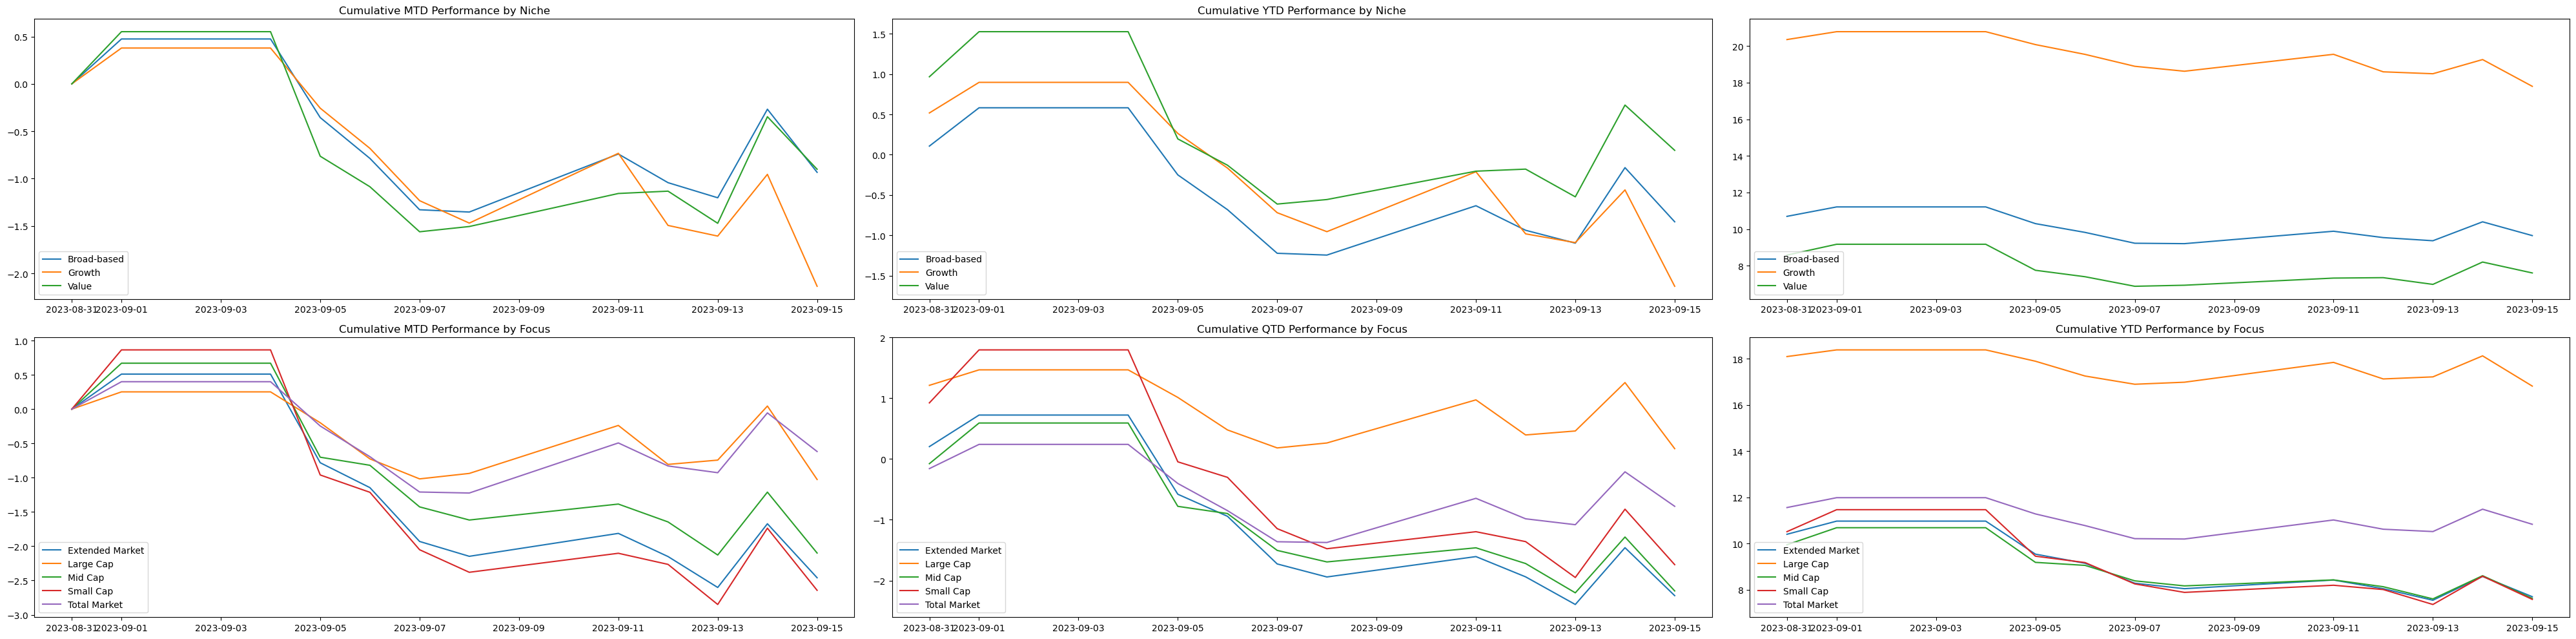

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axs= plt.subplots(2,3,figsize = (40,10))
df_g = df.dropna(how='any').groupby(['DATE','niche']).agg({'cum_ret_0M':'mean',
                                       'cum_ret_0Q':'mean',
                                       'cum_ret_0Y':'mean' })

axs[0,0].plot(df_g['cum_ret_0M'].dropna().unstack())
axs[0,0].legend(list(df_g.index.get_level_values(1)),loc = 'lower left')
axs[0,0].set_title('Cumulative MTD Performance by Niche')


axs[0,1].plot(df_g['cum_ret_0Q'].dropna().unstack())
axs[0,1].legend(list(df_g.index.get_level_values(1)),loc = 'lower left')
axs[0,1].set_title('Cumulative QTD Performance by Niche')


axs[0,2].plot(df_g['cum_ret_0Y'].dropna().unstack())
axs[0,2].legend(list(df_g.index.get_level_values(1)),loc = 'lower left')
axs[0,1].set_title('Cumulative YTD Performance by Niche')


df_g = df.dropna(how='any').groupby(['DATE','focus']).agg({'cum_ret_0M':'mean',
                                       'cum_ret_0Q':'mean',
                                       'cum_ret_0Y':'mean' })

axs[1,0].plot(df_g['cum_ret_0M'].dropna().unstack())
axs[1,0].legend(list(df_g.index.get_level_values(1)),loc = 'lower left')
axs[1,0].set_title('Cumulative MTD Performance by Focus')


axs[1,1].plot(df_g['cum_ret_0Q'].dropna().unstack())
axs[1,1].legend(list(df_g.index.get_level_values(1)),loc = 'lower left')
axs[1,1].set_title('Cumulative QTD Performance by Focus')


axs[1,2].plot(df_g['cum_ret_0Y'].dropna().unstack())
axs[1,2].legend(list(df_g.index.get_level_values(1)),loc = 'lower left')
axs[1,2].set_title('Cumulative YTD Performance by Focus')

plt.savefig('indexed_performance.png')
plt.tight_layout()

In [119]:
df_last = df.set_index(['DATE','lss_ticker']).unstack().tail(1).stack().dropna(how='any')

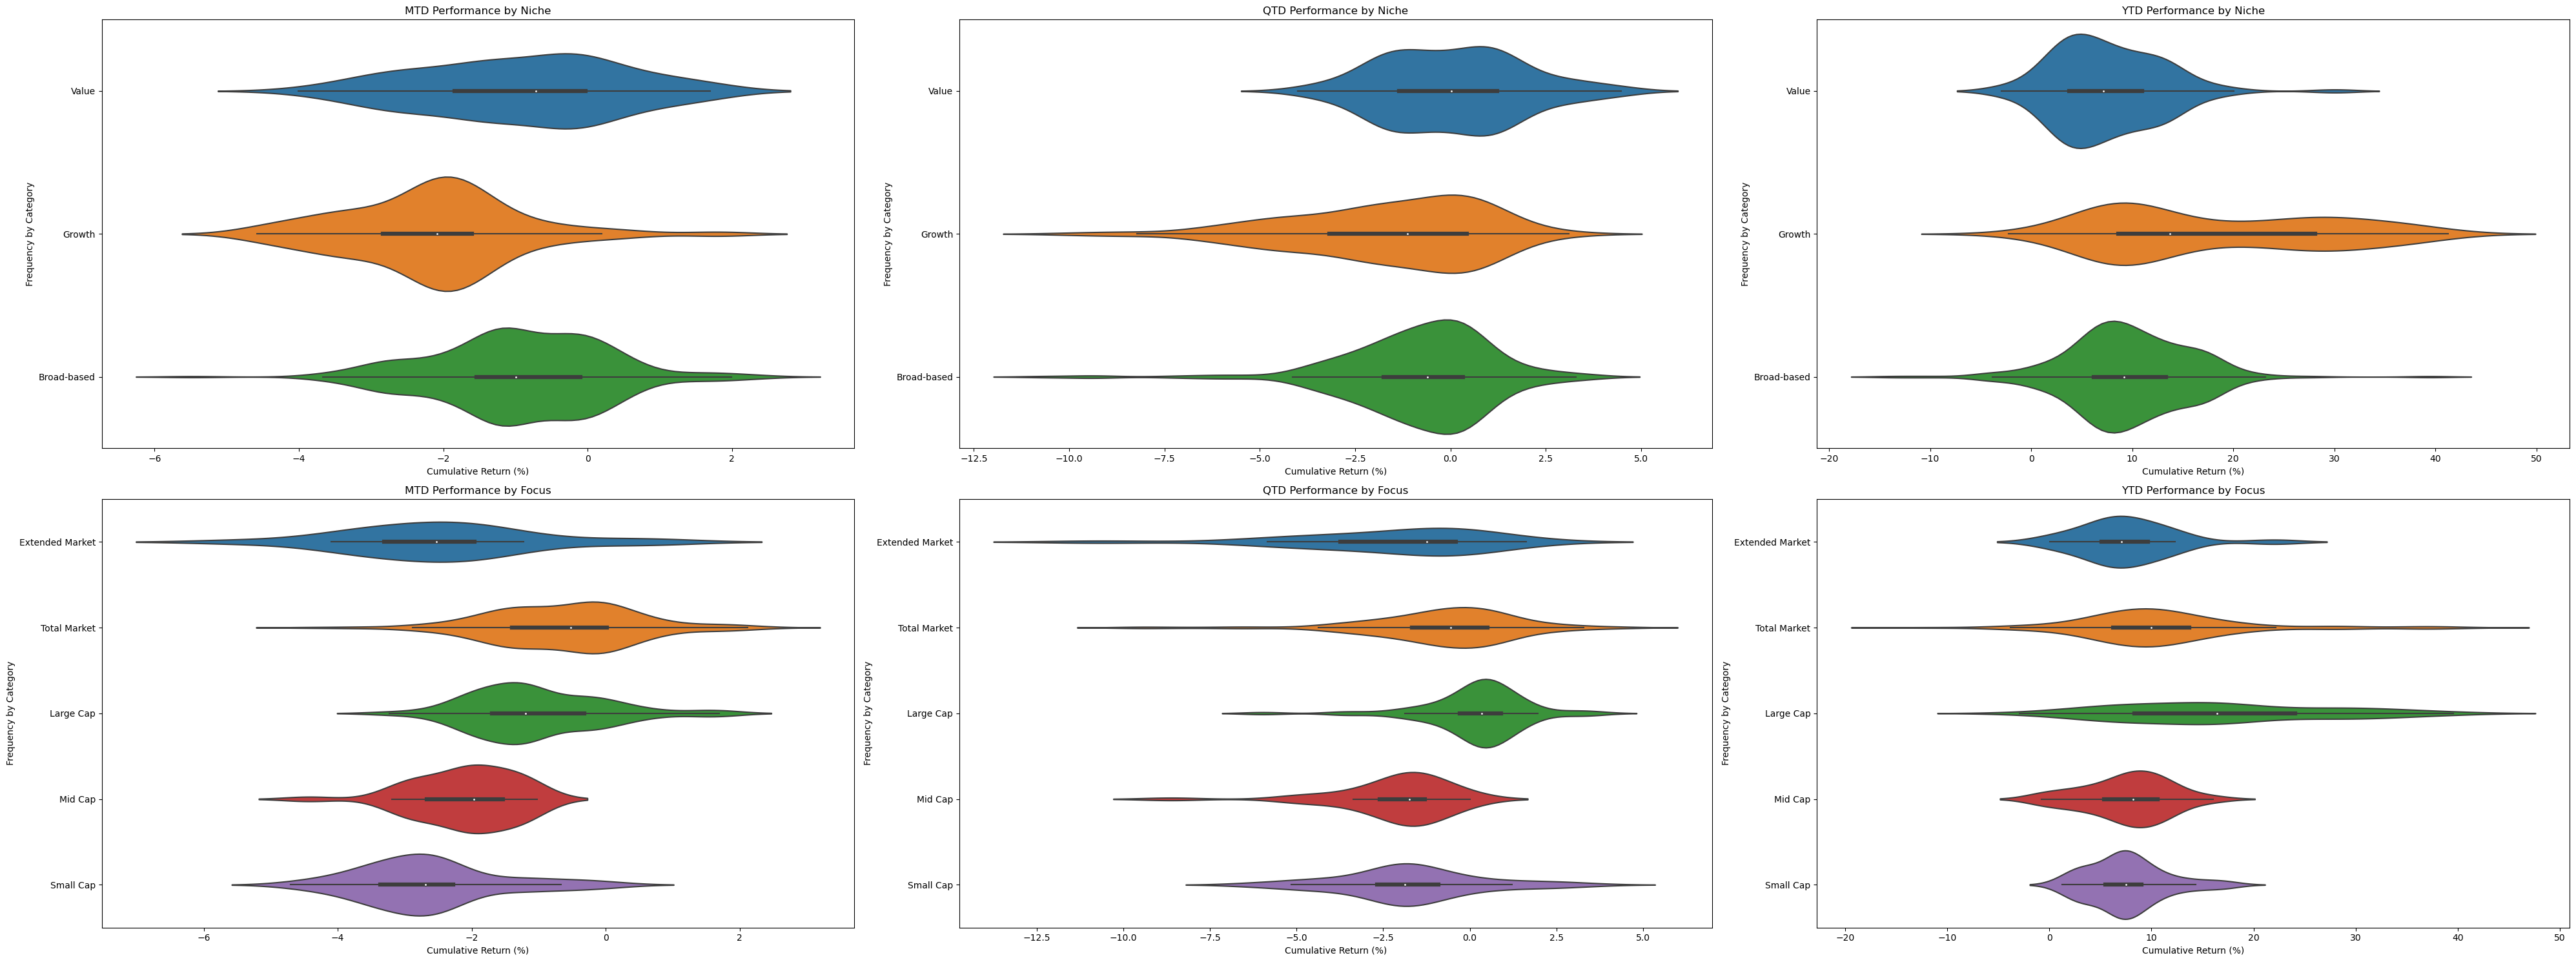

In [120]:
fig,axs= plt.subplots(2,3,figsize = (40,15))

sns.violinplot(df_last,x = 'cum_ret_0M',y='focus',ax=axs[1,0])
sns.violinplot(df_last,x = 'cum_ret_0M',y='niche',ax=axs[0,0])

sns.violinplot(df_last,x = 'cum_ret_0Q',y='focus',ax=axs[1,1])
sns.violinplot(df_last,x = 'cum_ret_0Q',y='niche',ax=axs[0,1])


sns.violinplot(df_last,x = 'cum_ret_0Y',y='focus',ax=axs[1,2])
sns.violinplot(df_last,x = 'cum_ret_0Y',y='niche',ax=axs[0,2])


axs[0,0].set_title('MTD Performance by Niche')
axs[0,0].set_xlabel('Cumulative Return (%)')
axs[0,0].set_ylabel('Frequency by Category')

axs[1,0].set_xlabel('Cumulative Return (%)')
axs[1,0].set_ylabel('Frequency by Category')
axs[1,0].set_title('MTD Performance by Focus')

axs[0,1].set_title('QTD Performance by Niche')
axs[0,1].set_xlabel('Cumulative Return (%)')
axs[0,1].set_ylabel('Frequency by Category')

axs[1,1].set_title('QTD Performance by Focus')
axs[1,1].set_xlabel('Cumulative Return (%)')
axs[1,1].set_ylabel('Frequency by Category')

axs[0,2].set_title('YTD Performance by Niche')
axs[0,2].set_xlabel('Cumulative Return (%)')
axs[0,2].set_ylabel('Frequency by Category')

axs[1,2].set_title('YTD Performance by Focus')
axs[1,2].set_xlabel('Cumulative Return (%)')
axs[1,2].set_ylabel('Frequency by Category')
plt.savefig('performance_distributions.png')
plt.tight_layout()